## Value-at-Risk Analysis

### Part A. For this analysis, we would like to use Fama-French “48 Industry Portfolios,” which are available on Ken French’s data library. We need to use the set of monthly returns for value weighted portfolios since January 1990. 

a)	Compute the 95% VaR for all industries using the modified Cornish-Fisher approach, sort them based on values, and show the results on a bar plot. 
b)	Compute the Sharpe ratio for all industries using annualized return and volatility, and assuming that the annual risk free rate is rf=3%. Sort the Sharpe ratios based on value and show the results on a bar plot. 
c)	Do you observe a relation between the results of parts (a) and (b)?
(HINT: For example, you can investigate whether industries with the highest values in part (a) also have the highest values in part (b), or other relations like this) 
d)	Use the VaR estimates from part (a) and compute the CVaR (i.e., Beyond VaR) for all portfolios. (Note: you need to build your own code for this part) 

In [110]:
# Import libraries for data manipulation
# these two lines of code usually help to get the code running again. its called a magic function.
# use this when your code downloads external packages
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import numpy as np
import pandas as pd
import scipy.stats

In [3]:
returns_norm = np.random.normal(0.01, 0.04, (10000,1))
returns_norm

array([[0.03198328],
       [0.06112917],
       [0.01385746],
       ...,
       [0.04406412],
       [0.00867178],
       [0.02984359]])

In [4]:
np.mean(returns_norm)

0.010469831391801339

In [11]:
ret = pd.read_csv("48_Industry_Portfolios_Returns_monthly.csv", header=0, index_col=0, na_values=-99.99)/100

# Check the initial index column of the data. it shows "192607" instead of "1926-07". We need to change this
ret.index

Int64Index([199001, 199002, 199003, 199004, 199005, 199006, 199007, 199008,
            199009, 199010,
            ...
            202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210,
            202211, 202212],
           dtype='int64', length=396)

In [12]:
ret.index = pd.to_datetime(ret.index, format="%Y%m").to_period("M")
ret.index

PeriodIndex(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
             '1990-07', '1990-08', '1990-09', '1990-10',
             ...
             '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
             '2022-09', '2022-10', '2022-11', '2022-12'],
            dtype='period[M]', length=396)

In [13]:
ret.head(3)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1990-01,-0.1145,-0.1013,-0.1063,-0.0903,-0.0865,-0.1138,-0.1074,-0.0926,-0.0771,-0.0916,...,-0.0496,-0.0732,-0.0762,-0.0565,-0.1217,-0.0973,-0.1059,-0.0850,-0.0826,-0.0988
1990-02,0.0940,-0.0080,-0.0089,0.0051,-0.0256,0.0063,0.0179,0.0028,0.0017,0.0268,...,0.0440,0.0586,0.0215,0.0222,-0.0008,0.0394,0.0139,0.0083,0.0090,0.0210
1990-03,0.0269,0.0529,0.0989,0.0621,0.0681,0.0675,0.0109,-0.0086,0.0417,0.0820,...,0.0412,0.0333,0.0307,0.0603,-0.0040,-0.0297,0.0011,0.0244,-0.0212,0.0446


## a) Compute the 95% VaR for all industries using the modified Cornish-Fisher approach, sort them based on values, and show the results on a bar plot. 

In [15]:
# Take a look at the columns in the data
ret.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ', 'Other'],
      dtype='object')

In [17]:
# remove space from column names
ret.columns = ret.columns.str.strip()
ret.columns

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin', 'Other'],
      dtype='object')

In [19]:
# mean return by industry
ret.mean()

Agric    0.009993
Food     0.008604
Soda     0.011255
Beer     0.010469
Smoke    0.011493
Toys     0.005969
Fun      0.010791
Books    0.006491
Hshld    0.008850
Clths    0.010362
Hlth     0.007976
MedEq    0.011053
Drugs    0.010398
Chems    0.009198
Rubbr    0.010171
Txtls    0.006795
BldMt    0.009814
Cnstr    0.010084
Steel    0.008489
FabPr    0.007631
Mach     0.010673
ElcEq    0.011174
Autos    0.009919
Aero     0.011661
Ships    0.011779
Guns     0.012634
Gold     0.005985
Mines    0.011282
Coal     0.011260
Oil      0.009773
Util     0.008223
Telcm    0.006288
PerSv    0.006754
BusSv    0.011554
Comps    0.011017
Chips    0.013430
LabEq    0.011771
Paper    0.007192
Boxes    0.009006
Trans    0.008922
Whlsl    0.008520
Rtail    0.010185
Meals    0.010177
Banks    0.009611
Insur    0.010393
RlEst    0.005990
Fin      0.011760
Other    0.004196
dtype: float64

In [22]:
# find the covariance monthly matrix ret["2002":].cov() and this is done by simply ".cov() and MPY by 12 to have it annually
# this 

# Remember, the leading diagonal of the covariance matrix is the variance of each industry as shown in the cov matrix
# from a mathematical point of view . It also shows you the cov(Food,Beer) = 1.14%
cov = ret["2002":].cov()*12
cov.head(3)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,0.050516,0.011145,0.012377,0.010312,0.014338,0.019074,0.028056,0.023772,0.009855,0.017932,...,0.021933,0.020639,0.020955,0.014472,0.016201,0.021444,0.018636,0.028724,0.026549,0.018191
Food,0.011145,0.016076,0.014356,0.011610,0.015464,0.015009,0.018079,0.015915,0.011982,0.014209,...,0.014147,0.013732,0.014793,0.011685,0.012730,0.014755,0.014876,0.019012,0.014858,0.013420
Soda,0.012377,0.014356,0.039983,0.016061,0.016404,0.022362,0.029317,0.023343,0.014523,0.022576,...,0.020243,0.018180,0.020829,0.016012,0.018014,0.021361,0.020625,0.034224,0.022366,0.019757


<Axes: >

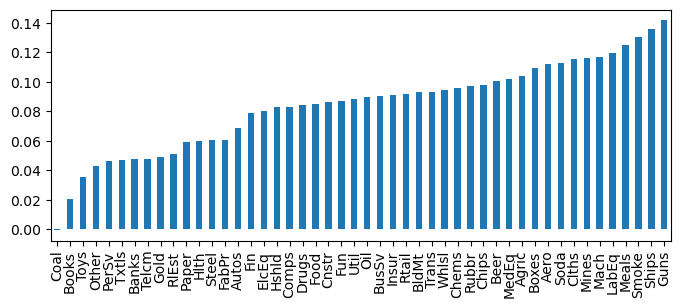

In [46]:
# Calculate the vector of returns
# we take... then divide it by '12' to get number of years which is 20. use shape[0] so it should sum the index
# instead and not the matrix since pd.shape() returns a matrix. BE CAREFUL TO AVOID ERRORS 
n_years = ret["2002":].shape[0]/12

# use the matrix as returns now (R) to calculate cummulative returns like the formula says < (1+R)^1/n_years -1 >
eret = ((1+ret["2002":]).prod())**(1/n_years)-1

# Visualize the matrix. The coal industry has a negative average annual return of -0.04 for the last 20 years. 
eret.sort_values().plot.bar(figsize=(8,3))

In [48]:
# find the covariance monthly matrix ret["2002":].cov() and this is done by simply ".cov() and MPY by 12 to have it annually
# this 

# Remember, the leading diagonal of the covariance matrix is the variance of each industry as shown in the cov matrix
# from a mathematical point of view . It also shows you the cov(Food,Beer) = 1.14%
cov = ret["2002":].cov()*12
cov.head(3)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,0.050516,0.011145,0.012377,0.010312,0.014338,0.019074,0.028056,0.023772,0.009855,0.017932,...,0.021933,0.020639,0.020955,0.014472,0.016201,0.021444,0.018636,0.028724,0.026549,0.018191
Food,0.011145,0.016076,0.014356,0.011610,0.015464,0.015009,0.018079,0.015915,0.011982,0.014209,...,0.014147,0.013732,0.014793,0.011685,0.012730,0.014755,0.014876,0.019012,0.014858,0.013420
Soda,0.012377,0.014356,0.039983,0.016061,0.016404,0.022362,0.029317,0.023343,0.014523,0.022576,...,0.020243,0.018180,0.020829,0.016012,0.018014,0.021361,0.020625,0.034224,0.022366,0.019757


In [50]:
n_months=ret.shape[0]
n_years=n_months/12
n_years

33.0

In [52]:
annual_mret=(1+ret).prod()**(1/n_years)-1
annual_mret

Agric    0.101274
Food     0.097361
Soda     0.114240
Beer     0.118086
Smoke    0.117312
Toys     0.043099
Fun      0.098056
Books    0.058509
Hshld    0.099717
Clths    0.103400
Hlth     0.072206
MedEq    0.123888
Drugs    0.118194
Chems    0.094071
Rubbr    0.105969
Txtls    0.040980
BldMt    0.096750
Cnstr    0.094803
Steel    0.057287
FabPr    0.053236
Mach     0.105523
ElcEq    0.113967
Autos    0.076676
Aero     0.119808
Ships    0.113677
Guns     0.137400
Gold     0.003310
Mines    0.099702
Coal     0.041586
Oil      0.095618
Util     0.092475
Telcm    0.061249
PerSv    0.061475
BusSv    0.120959
Comps    0.101505
Chips    0.128939
LabEq    0.123943
Paper    0.072977
Boxes    0.090834
Trans    0.092884
Whlsl    0.091539
Rtail    0.111934
Meals    0.111854
Banks    0.094906
Insur    0.113153
RlEst    0.038661
Fin      0.118917
Other    0.026972
dtype: float64

<Axes: >

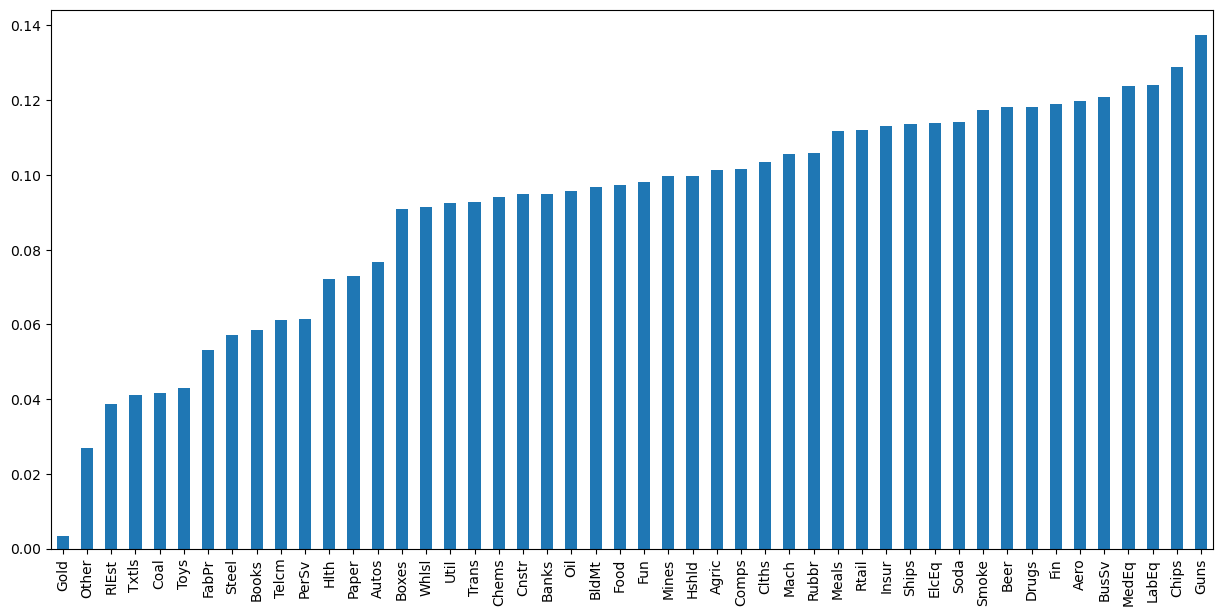

In [54]:
annual_mret.sort_values().plot.bar(figsize=(15,7))

In [57]:
annual_vol=ret.std() * np.sqrt(12)
annual_vol

Agric    0.217134
Food     0.141829
Soda     0.230852
Beer     0.164323
Smoke    0.229568
Toys     0.241284
Fun      0.264395
Books    0.205026
Hshld    0.146771
Clths    0.225930
Hlth     0.226241
MedEq    0.173951
Drugs    0.159050
Chems    0.200410
Rubbr    0.204694
Txtls    0.287333
BldMt    0.222238
Cnstr    0.243438
Steel    0.301649
FabPr    0.279365
Mach     0.232056
ElcEq    0.226264
Autos    0.304512
Aero     0.225164
Ships    0.257873
Guns     0.209072
Gold     0.379665
Mines    0.280470
Coal     0.432059
Oil      0.226850
Util     0.140225
Telcm    0.177585
PerSv    0.204739
BusSv    0.218894
Comps    0.263538
Chips    0.277209
LabEq    0.217905
Paper    0.177346
Boxes    0.202983
Trans    0.188825
Whlsl    0.168529
Rtail    0.177523
Meals    0.176306
Banks    0.217933
Insur    0.183343
RlEst    0.260951
Fin      0.235946
Other    0.215744
dtype: float64

<Axes: >

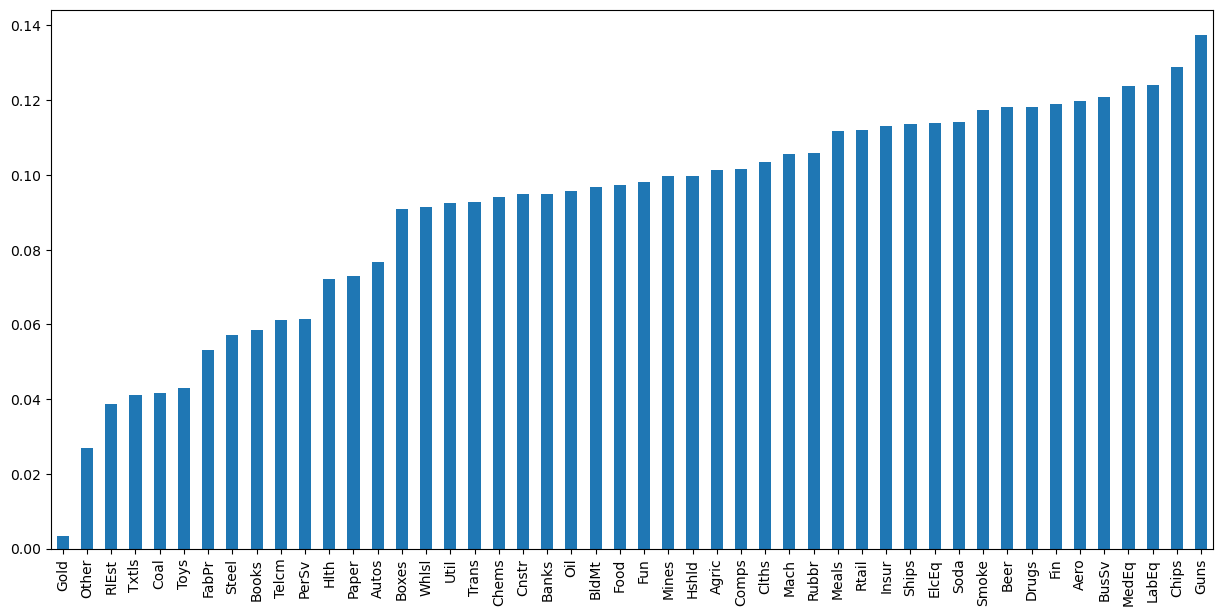

In [58]:
annual_mret.sort_values().plot.bar(figsize=(15,7))

## Annualizing the return and volatility

## 95% VaR for all industries using the modified Cornish-Fisher approach

In [26]:
from scipy.stats import norm

In [44]:
z = norm.ppf(0.05)
z

-1.6448536269514729

In [30]:
z = norm.ppf(0.05)
s = scipy.stats.skew(ret[-120:])
k = scipy.stats.kurtosis(ret[-120:])
z_cf = (z
    + (z**2 - 1)*s/6
    + (z**3 - 3*z)*k/24
    - (2*z**3 - 5*z)*(s**2)/36)
z_cf  

array([-1.59445314, -1.65259842, -1.78042032, -1.68194653, -1.77229819,
       -1.69469963, -1.73620556, -1.60140113, -1.67837267, -1.71254114,
       -1.73145547, -1.7667755 , -1.69825535, -1.72892546, -1.69755338,
       -1.82328352, -1.78240993, -1.750289  , -1.5927086 , -1.75488796,
       -1.70326615, -1.65336763, -1.2126521 , -1.62948136, -1.72128602,
       -1.49738751, -1.42404173, -1.63628864, -1.6584632 , -1.50177953,
       -1.78628147, -1.71490699, -1.78387492, -1.70315901, -1.68116201,
       -1.71858682, -1.72150043, -1.7276984 , -1.69914256, -1.73972319,
       -1.70642384, -1.56487588, -1.69088377, -1.76003062, -1.64887758,
       -1.7457296 , -1.68679642, -1.66149556])

In [32]:
VaR_cf = -1 * (ret.mean() + z_cf * ret[-120:].std())
VaR_cf

Agric    0.083181
Food     0.056856
Soda     0.068016
Beer     0.056572
Smoke    0.088588
Toys     0.127301
Fun      0.118660
Books    0.100277
Hshld    0.057690
Clths    0.095557
Hlth     0.096713
MedEq    0.077321
Drugs    0.062548
Chems    0.091422
Rubbr    0.084701
Txtls    0.143451
BldMt    0.105843
Cnstr    0.113399
Steel    0.137397
FabPr    0.160813
Mach     0.094883
ElcEq    0.098222
Autos    0.116139
Aero     0.103893
Ships    0.103662
Guns     0.068284
Gold     0.148726
Mines    0.122490
Coal     0.214451
Oil      0.121653
Util     0.065534
Telcm    0.072706
PerSv    0.092680
BusSv    0.074094
Comps    0.080436
Chips    0.095284
LabEq    0.076875
Paper    0.076345
Boxes    0.080293
Trans    0.093310
Whlsl    0.077460
Rtail    0.068738
Meals    0.072434
Banks    0.095378
Insur    0.062725
RlEst    0.123393
Fin      0.086863
Other    0.073798
dtype: float64

##  Sorting the  95% VaR based on values, and showing the results on a bar plot.

In [34]:
VaR_cf = -1 * (ret.mean() + z_cf * ret[-120:].std())
VaR_cf.sort_values()

Beer     0.056572
Food     0.056856
Hshld    0.057690
Drugs    0.062548
Insur    0.062725
Util     0.065534
Soda     0.068016
Guns     0.068284
Rtail    0.068738
Meals    0.072434
Telcm    0.072706
Other    0.073798
BusSv    0.074094
Paper    0.076345
LabEq    0.076875
MedEq    0.077321
Whlsl    0.077460
Boxes    0.080293
Comps    0.080436
Agric    0.083181
Rubbr    0.084701
Fin      0.086863
Smoke    0.088588
Chems    0.091422
PerSv    0.092680
Trans    0.093310
Mach     0.094883
Chips    0.095284
Banks    0.095378
Clths    0.095557
Hlth     0.096713
ElcEq    0.098222
Books    0.100277
Ships    0.103662
Aero     0.103893
BldMt    0.105843
Cnstr    0.113399
Autos    0.116139
Fun      0.118660
Oil      0.121653
Mines    0.122490
RlEst    0.123393
Toys     0.127301
Steel    0.137397
Txtls    0.143451
Gold     0.148726
FabPr    0.160813
Coal     0.214451
dtype: float64

<Axes: >

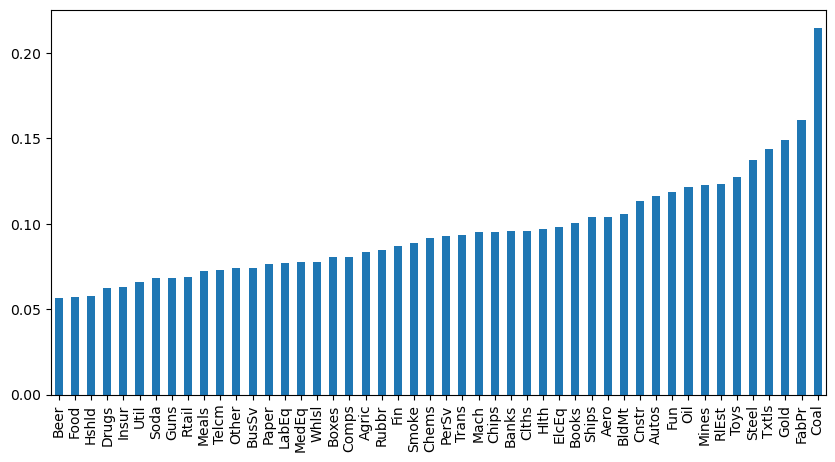

In [59]:
VaR_cf = -1 * (ret.mean() + z_cf * ret[-120:].std())
VaR_cf.sort_values().plot.bar(figsize=(10,5))

## Calculate the Sharpe Ratio using annualized return and volatilities (The Annual Risk free rate is assummed to be 3%)

In [60]:
rf=0.03
sharpe_ratio=(annual_mret-rf)/annual_vol
sharpe_ratio

Agric    0.328249
Food     0.474946
Soda     0.364910
Beer     0.536054
Smoke    0.380331
Toys     0.054289
Fun      0.257404
Books    0.139050
Hshld    0.475003
Clths    0.324880
Hlth     0.186551
MedEq    0.539739
Drugs    0.554506
Chems    0.319700
Rubbr    0.371133
Txtls    0.038215
BldMt    0.300354
Cnstr    0.266201
Steel    0.090461
FabPr    0.083173
Mach     0.325452
ElcEq    0.371102
Autos    0.153281
Aero     0.398856
Ships    0.324489
Guns     0.513700
Gold    -0.070298
Mines    0.248520
Coal     0.026816
Oil      0.289257
Util     0.445533
Telcm    0.175964
PerSv    0.153731
BusSv    0.415539
Comps    0.271326
Chips    0.356910
LabEq    0.431120
Paper    0.242334
Boxes    0.299701
Trans    0.333030
Whlsl    0.365156
Rtail    0.461542
Meals    0.464273
Banks    0.297825
Insur    0.453539
RlEst    0.033191
Fin      0.376855
Other   -0.014034
dtype: float64

In [63]:
rf=0.03
sharpe_ratio=(annual_mret-rf)/annual_vol
sharpe_ratio.sort_values()

Gold    -0.070298
Other   -0.014034
Coal     0.026816
RlEst    0.033191
Txtls    0.038215
Toys     0.054289
FabPr    0.083173
Steel    0.090461
Books    0.139050
Autos    0.153281
PerSv    0.153731
Telcm    0.175964
Hlth     0.186551
Paper    0.242334
Mines    0.248520
Fun      0.257404
Cnstr    0.266201
Comps    0.271326
Oil      0.289257
Banks    0.297825
Boxes    0.299701
BldMt    0.300354
Chems    0.319700
Ships    0.324489
Clths    0.324880
Mach     0.325452
Agric    0.328249
Trans    0.333030
Chips    0.356910
Soda     0.364910
Whlsl    0.365156
ElcEq    0.371102
Rubbr    0.371133
Fin      0.376855
Smoke    0.380331
Aero     0.398856
BusSv    0.415539
LabEq    0.431120
Util     0.445533
Insur    0.453539
Rtail    0.461542
Meals    0.464273
Food     0.474946
Hshld    0.475003
Guns     0.513700
Beer     0.536054
MedEq    0.539739
Drugs    0.554506
dtype: float64

<Axes: >

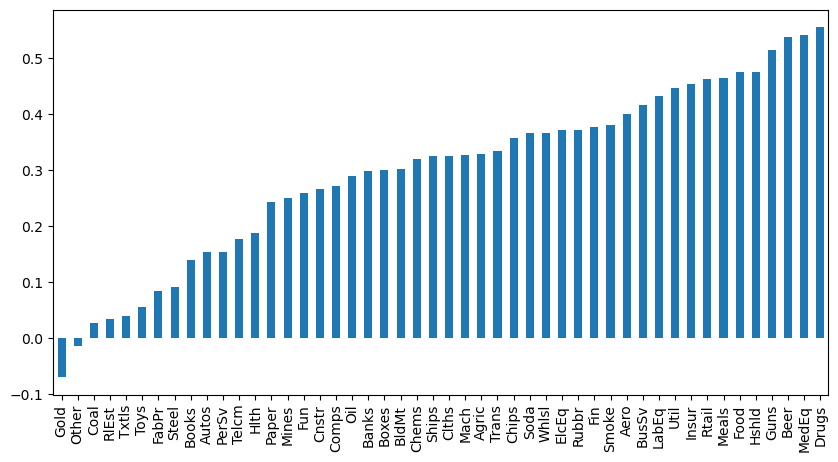

In [65]:
rf=0.03
sharpe_ratio=(annual_mret-rf)/annual_vol
sharpe_ratio.sort_values().plot.bar(figsize=(10,5))


## There is a negative relationship between the 95% VaR values and the sharpe ratio values of the industries.

In [112]:
portfolio_losses = pd.Series(scipy.stats.norm.rvs(size=1000))
VaR_cf = scipy.stats.norm.ppf(0.95)
CVaR_cf = (1/(1-0.95))*scipy.stats.norm.expect(lambda x: x, lb=VaR_cf)
print("CVaR_cf = ", CVaR_cf)

CVaR_cf =  2.062712807818914


### Part B. Efficient Frontier Analysis
Use the same file that you used in the previous problem, that is the Fama-French 48 Industry Portfolios, monthly value-weighted returns, since January 1990. 
i.	Pick your favorite two industries and plot the two-asset efficient frontier using annual returns and volatilities. To do so, create portfolios of the two assets with weights in the increments of 0.10, for example (0, 1), (0.1, 0.9), (0.2, 0.8), ... . 
ii.	Among these portfolios, characterize the minimum-variance portfolio. That is, determine the asset weights, portfolio return, and portfolio volatility.

In [67]:
def portfolio_ret(weights, returns):
    """
    weights + returns --> portfolio return
    """
    return weights.T@returns

In [69]:
def portfolio_vol(weights, covmat):
    """
    weights + covmat --> portfolio volatility
    """
    return (weights.T@covmat@weights) ** 0.5

In [96]:
l = ["Hlth", "Drugs",]
annual_mret[l]

Hlth     0.072206
Drugs    0.118194
dtype: float64

In [98]:
cov = ret["2002":].cov()*12
cov.shape

(48, 48)

In [99]:
cov.loc[l,l]

,Hlth,Drugs
Hlth,0.042216,0.014756
Drugs,0.014756,0.020504


In [100]:
w = np.array([.10, .90])
w

array([0.1, 0.9])

In [101]:
n_points = 11
weights = [np.array([w, 1-w]) for w in np.linspace(0,1,n_points) ]
weights

[array([0., 1.]),
 array([0.1, 0.9]),
 array([0.2, 0.8]),
 array([0.3, 0.7]),
 array([0.4, 0.6]),
 array([0.5, 0.5]),
 array([0.6, 0.4]),
 array([0.7, 0.3]),
 array([0.8, 0.2]),
 array([0.9, 0.1]),
 array([1., 0.])]

In [102]:
l=["Hlth", "Drugs"]
returns=[portfolio_ret(w, annual_mret[l]) for w in weights]
vols=[portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"Returns": returns, "Risk": vols})
ef.head()

,Returns,Risk
0,0.118194,0.143192
1,0.113595,0.140308
2,0.108996,0.139761
3,0.104398,0.141577
4,0.099799,0.145668


<Axes: xlabel='Risk'>

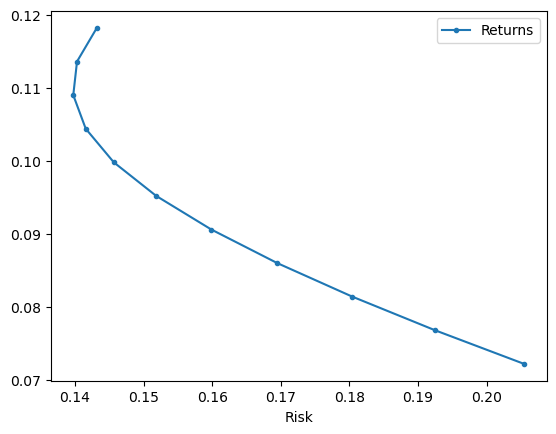

In [103]:
ef.plot.line(x="Risk", y="Returns", style=".-")

In [105]:
portfolio_ret(w,annual_mret[l])

0.11359520988397016

In [106]:
portfolio_vol(w, cov.loc[l,l])

0.14030846712678202